# Midterm Exam
Machine Learning in Statistics - Fall 2022

Megan Waldo


### - READ THESE INSTRUCTIONS CAREFULLY


- You have until Monday 10/17 (MIDNIGHT) to begin taking the exam
- Once you begin the exam you will have six hours to complete it
- The exam is open book so there will be no proctoring nor lockdown browser. 
- You are supposed to work individually and submit the test individually. Any suspicion of plagiarism or academic misconduct will be reported
- The Exam consist of 4 problems, equally weighted. Partial credit can be awarded.
- Parts of the tests have many right answers so it is unlikely that two or more individuals will choose the same answer. 
- As in any test, there will be questions I can answer (question clarification) and some that I cannot answer (those that would implicitly solve the question for you).
- Submit a Jupyter notebook with your code and a written explanation for each question.
- PLEASE DO NOT do more than what it is required from you to do. I have to be able to read your code without unnecessary functions. Your code lines must have a purpose. Extra graphics, or extra analysis to support your answer may be acceptable ONLY if you place it at the end of your answer and explicitly state so (put a header of “Extra Analysis”).
- Where not specified, ACCURACY should be the metric to evaluate the performance of a model.
- You are allowed to make any assumptions NECESSARY to answer the question, in case more details were not provided.
- Read and re-read the questions. Make sure you are doing what is being asked from you.
- Be concise. More text do not translate into better answers.

#### IMPORTANT:
Generate your own *Mynumber* number with the code below. You just need the first and the last letter of your first name to generate this number. You will use this number to answer different questions in the exam. I use my name as example below



In [1]:
#Enter the first and the last letter of your first name CAPITALIZED in the code below to generate a Mynumber number.

# First=ord('First letter in quotes capitalized')
# Last=ord('Last Letter in quotes capitalized')
# Mynumber=First+Last

#My first name is MEGAN 

#In capitals, my first letter is M, and my last letter is N. So:

First=ord('M')
Last=ord('N')

#Therefore
Mynumber=First+Last




In [2]:
print(Mynumber)
#Mynumber for my name MEGAN is 153


155


In [3]:
# Import Libraries

import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import pandas as pd
import os
import tarfile # For Housing Data Set
import urllib # For Housing Data Set

# Plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

np.random.seed(42)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# Import Tools

from sklearn import datasets 
    # to import data set

from sklearn.model_selection import train_test_split 
    # Split arrays or matrices into random train and test subsets.
    # Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.
    # example in MNIST 1 

# for creating a stratified sample
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import StratifiedShuffleSplit  
 
from sklearn.impute import SimpleImputer
    # impute missing values in a df
from sklearn.pipeline import Pipeline
    # for creating pipelines while performing data transformations on a df
from sklearn.compose import ColumnTransformer
    # transform feature data types
from sklearn.base import clone 
    # to clone data frames
from sklearn.preprocessing import StandardScaler
    # Feature scaling
from sklearn.preprocessing import OneHotEncoder
    # Put variables in an array for doing data transformations
from sklearn.preprocessing import PolynomialFeatures 
    # Use for creating polynomial variables

from sklearn.metrics import confusion_matrix 
    # get confusion matrix of TP, FP, FN, and TN
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
    # get RMSE

# Get different types of classifier/regression algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
# types of regression algorithms - random forest is one too for ensemble learning (v powerful)
    # include random_state parameter if algorithm requires randomness
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
    # If you want to run stochastic gradient descent on a linear regression

from sklearn.model_selection import cross_val_score 
    # to get accuracy score
from sklearn.model_selection import cross_val_predict 
    # to predict 
    # use after creating stratified sample 

# Problem 1

Generate data using the code provided below. 

Estimate a Decision Tree classifier
with $max depth$ as the regulazing parameter. Through crossvalidation, estimate the best $max depth$ parameter you are able to find, and explain your reasoning. 

*Make any extra assumptions you think are necessary to answer this question. Your own individual assumptions and reasoning will be graded.*


In [457]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=Mynumber, noise=0.25, random_state=Mynumber)

Xm.shape

(155, 2)

In [458]:
ym.shape

(155,)

In [476]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.4, random_state=Mynumber)

In [477]:
print("Proportion of X Train Data: " + str((len(X_train)/len(X))))
print("Proportion of X Test Data: " + str(len(X_test)/len(X)))

Proportion of X Train Data: 0.93
Proportion of X Test Data: 0.62


In [ ]:
# Cross validation max depth = 2

In [490]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [492]:
y_predict = tree_clf.predict(X_test)

In [493]:
# Get accuracy score of new predictions
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_test, y_predict, cv=3, scoring="accuracy")

array([0.95238095, 1.        , 0.95      ])

In [494]:
# Compare to all data
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, Xm, ym, cv=3, scoring="accuracy")

array([0.94230769, 0.84615385, 0.88235294])

In [514]:
# Cross validation max depth = 3

In [515]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=Mynumber)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=155)

In [497]:
y_predict = tree_clf.predict(X_test)

In [498]:
# Calculate accuracy scores for testing data
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_test, y_predict, cv=3, scoring="accuracy")

array([0.95238095, 1.        , 0.95      ])

In [499]:
# Compare to all data
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, Xm, ym, cv=3, scoring="accuracy")

array([0.92307692, 0.82692308, 0.8627451 ])

In [516]:
# Cross validation max depth = 4

In [510]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=Mynumber)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=155)

In [511]:
y_predict = tree_clf.predict(X_test)

In [512]:
# Get accuracy score of new predictions
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_test, y_predict, cv=3, scoring="accuracy")

array([0.85714286, 0.95238095, 0.85      ])

In [513]:
# Compare to all data
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, Xm, ym, cv=3, scoring="accuracy")

array([0.92307692, 0.82692308, 0.8627451 ])

In [ ]:
# Cross validation max depth = 5


In [522]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=Mynumber)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=155)

In [523]:
y_predict = tree_clf.predict(X_test)

In [524]:
# Get accuracy score of new predictions
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_test, y_predict, cv=3, scoring="accuracy")

array([0.85714286, 0.9047619 , 0.85      ])

In [521]:
# Compare to all data
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, Xm, ym, cv=3, scoring="accuracy")

array([0.92307692, 0.86538462, 0.92156863])

Maxdepth = 3 performed the best as its accuracy score for the predicted y values and the for the regressor were the highest.

# Problem 2

Load the MNIST digits data. 

Divide the data between those equal or greater than five, and those less than five.


In [14]:
# MNIST Data Set

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [21]:
X, y = mnist["data"], mnist["target"]
X=X.values

import numpy as np
np.random.seed(123)
y = y.astype(np.uint8)


In [26]:
# Divide the data between those equal or greater than five, and those less than five.

In [27]:
y_ge_5 = (y>=5) 

In [37]:
y_ge_5

0         True
1        False
2        False
3        False
4         True
         ...  
69995    False
69996    False
69997    False
69998     True
69999     True
Name: class, Length: 70000, dtype: bool

In [38]:
type(y_ge_5)

pandas.core.series.Series

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Part 1
Partitioning the data between a training and testing set, and using an SGDClassifier, predict that the number is equal or greater than five. Test the algorithm performance on the testing set.



In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

In [52]:
y_train_ge_5 = (y_train>=5) 
y_test_ge_5 = (y_test >=5)  

In [53]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=20, random_state=42)

sgd_clf.fit(X_test, y_test_ge_5)

/Users/mwaldo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=20, random_state=42)

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_test, y_test_ge_5, cv=3, scoring="accuracy")

/Users/mwaldo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/mwaldo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/mwaldo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.81714286, 0.81028571, 0.82528571])

Algorithm performs with 81% accuracy

### Part 2
Using the code outputs the individual thresholds for each observation to be classified as True. Use different values of a threshold to show how the precision score and the recall score have an inverse relationship.


*Make any extra assumptions you think are necessary to answer this question.*

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [70]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_test, y_test_ge_5, cv=3)

/Users/mwaldo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/mwaldo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/mwaldo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [71]:
from sklearn.metrics import precision_score, recall_score

In [72]:
y_scores = sgd_clf.decision_function(X_test)

In [77]:
threshold1 = 3
y_test_pred = (y_scores > threshold1)
pre=precision_score(y_test_ge_5, y_test_pred)
rec=recall_score(y_test_ge_5, y_test_pred)


In [78]:
print(pre,rec)

0.8771000112752283 0.7536330168571982


At a threshold of 3, precision is 87% and recall is 75%

In [79]:
threshold2 = -20
y_test_pred = (y_scores > threshold2)
pre=precision_score(y_test_ge_5, y_test_pred)
rec=recall_score(y_test_ge_5, y_test_pred)
print(pre,rec)

0.5424957662997459 0.9931214880837047


At a threshold of -20, precision is 54% and recall is 99%

In [80]:
threshold2 = 100
y_test_pred = (y_scores > threshold2)
pre=precision_score(y_test_ge_5, y_test_pred)
rec=recall_score(y_test_ge_5, y_test_pred)
print(pre,rec)

0.9766081871345029 0.016179035070722728


At a threshold of 100, precision is 97% and recall is 1.6%

# Problem 3

Load the CA housing data set.  Use TWO algorithms to predict median_income. Make all the data transformations needed and report results.

*There are many ways to achieve this, so there are many correct answers.*
*Make any extra assumptions you think are necessary to answer this question.*


In [226]:
# CA Housing Data Set

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()


In [227]:
# Describe range of values in each df feature
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [228]:
# Describe the data types of each feature in the df
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [229]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head(1000)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [230]:
#Look at correlation between median_house_value and other vairables
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [231]:
# Data Frame Notes:
   
    # Missing Data (Non-Null Count Differences)
        # Column 4, total_bedrooms has a Non-Null Count=20,433. 
        # The rest of the variables' counts are 20,640 (N).
            # total_bedrooms has missing values
            # variable will require imputation before algorithm
    
    # Datatype Differences (Dtype Differences)
        # Column 8, ocean_proximity's datatype is an object.
        # The rest of the variables are float64.
            # ocean_proximity has a character variable
            # variable will need to be transformed into a numeric code before algorithm
    
    # median_income is correlated the highest with median_house_vlue   

In [232]:
# Drop censored values to make for a better prediction
housing.drop(housing[(housing["median_house_value"] == 500001)].index, axis=0, inplace=True)

housing = housing.reset_index(drop=True)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
19670,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
19671,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
19672,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
19673,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [233]:
# Split data into train and test set

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [234]:
# Redistribute income_cat variable bc it was highly correlates

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [235]:
housing["income_cat"].value_counts()

3.0    7103
2.0    6552
4.0    3502
5.0    1704
1.0     814
Name: income_cat, dtype: int64

In [236]:
# Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

# 80/20 with a single splint. Random generate is 42. 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Create two datasets by splitting the housing data stratified by housing["income_cat"]
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.reindex(train_index)
    strat_test_set = housing.reindex(test_index)

In [237]:
train_index

array([   38, 17797,  4783, ...,  3566, 10631,  9223])

In [238]:
# Create x and y datasets for regression
housing = train_set.drop("median_income", axis=1) 
    # example of dropping variables in Week 2
housing_labels = train_set["median_income"].copy()



In [239]:
# reset the index
housing = housing.reset_index(drop=True)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
0,-120.50,37.34,16.0,1245.0,231.0,956.0,219.0,108000.0,INLAND
1,-119.81,36.77,43.0,2341.0,395.0,890.0,375.0,85000.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,213400.0,<1H OCEAN
3,-121.30,38.70,18.0,7334.0,1332.0,3339.0,1271.0,124700.0,INLAND
4,-121.04,37.50,33.0,613.0,123.0,343.0,116.0,129200.0,INLAND
...,...,...,...,...,...,...,...,...,...
15735,-121.08,40.19,11.0,919.0,199.0,69.0,43.0,137500.0,INLAND
15736,-121.48,38.56,52.0,814.0,216.0,327.0,181.0,125000.0,INLAND
15737,-118.27,33.77,39.0,1731.0,485.0,2115.0,478.0,141300.0,NEAR OCEAN
15738,-121.93,37.49,5.0,1150.0,311.0,648.0,245.0,300000.0,<1H OCEAN


In [240]:
housing.shape # x variables in training set

(15740, 9)

In [241]:
housing_labels.shape # y variables in training set

(15740,)

In [242]:
# Drop income_cat to return data to original dataset
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [243]:
# reset the index
housing = housing.reset_index(drop=True)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
0,-120.50,37.34,16.0,1245.0,231.0,956.0,219.0,108000.0,INLAND
1,-119.81,36.77,43.0,2341.0,395.0,890.0,375.0,85000.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,213400.0,<1H OCEAN
3,-121.30,38.70,18.0,7334.0,1332.0,3339.0,1271.0,124700.0,INLAND
4,-121.04,37.50,33.0,613.0,123.0,343.0,116.0,129200.0,INLAND
...,...,...,...,...,...,...,...,...,...
15735,-121.08,40.19,11.0,919.0,199.0,69.0,43.0,137500.0,INLAND
15736,-121.48,38.56,52.0,814.0,216.0,327.0,181.0,125000.0,INLAND
15737,-118.27,33.77,39.0,1731.0,485.0,2115.0,478.0,141300.0,NEAR OCEAN
15738,-121.93,37.49,5.0,1150.0,311.0,648.0,245.0,300000.0,<1H OCEAN


In [244]:
housing = strat_train_set.copy()

Transform Data:

In [245]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Prep for Regression Algorithms

In [246]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set

housing_labels = strat_train_set["median_house_value"].copy()

In [247]:
# Remove text feature
housing_num = housing.drop('ocean_proximity', axis=1)

In [248]:
# Pipeline 1

# Build pipeline to both impute and scale the data features all in one step
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),

        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [249]:
# Pipeline 2 - Full pipeline to preprocess numerical and categorical variables

from sklearn.compose import ColumnTransformer


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [250]:
housing_prepared # final prepared data

array([[-1.34009174,  1.01157329,  1.8827453 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.36997407,  2.28691739, -1.07211871, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65206347, -0.76646117,  1.48343935, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.53253416, -0.66406128, -0.19364563, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82637705, -0.84558836, -0.27350682, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02632729,  0.4716466 ,  0.44524389, ...,  0.        ,
         0.        ,  0.        ]])

- Use TWO algorithms to predict median_income.

In [251]:
# Algorithm 1: Linear Regression

In [252]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Fit linear regression
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [115]:
# Get the RMSE Score

from sklearn.model_selection import cross_val_score
# Select cross validation with 10 folds
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)


array([61600.52038344, 58799.1003841 , 60916.98332998, 61126.13921167,
       59735.75247887, 64621.46679108, 61342.26124825, 61091.12844707,
       63971.92354514, 59639.37629365])

In [118]:
lin_rmse_scores.mean()

61284.465211323404

Linear Model's RMSE = 61,284

In [ ]:
# Algorithm 2: Random Forest Regressor

In [256]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [257]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


16868.34876453883

In [258]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
    

In [259]:
forest_rmse_scores.mean()

45606.849682877866

Random Forest Model's RMSE=  45,606

In [ ]:
# Display accuracy score for Random Forest

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

clf_cv = cross_val_score(forest_reg, housing_num, housing_labels,
                             scoring="accuracy", cv=5)
display_scores(clf_cv)

# Problem 4

Look up your number generated *Mynumber* above. 

If your generated *Mynumber*  number is odd, generate the artificial data:

$Y = 0.3X^2 + X + 2 + R$.

If your generated *Mynumber*  number is even, generate the artificial data:

$Y = 1.8X^2+0.2X + 4 + R$.

##### (In our Week 4 class code you can find the code to generate this type of equations)


Write then the code to estimate the theta parameters, $$ \hat{\theta}$$ of a Ridge regression applied to this data using a Batch Gradient Descent algorithm. 

Explain the results you arrive to in comparison with a simple linear regression. It is possible that the results you obtain are not optimal. Nevertheless, it is critical that you know how to describe these results.

*Make any extra assumptions you think are necessary to answer this question. Your own individual assumptions and reasoning will be graded.*


In [294]:
# My number is 155

np.random.seed(42) #creates a random variable
import numpy as np


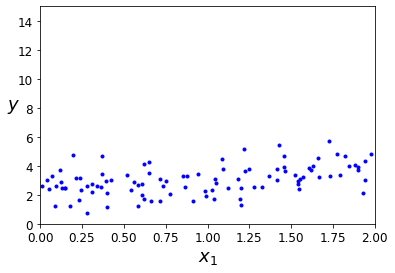

In [295]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [300]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance 
    #don't forget about adding column 1 to your np.ones statement

In [301]:
# set step at 0.1
eta = 0.1
# number of steps
n_iterations = 1000
# number of observations
m = 100
# randomly set the starting point (randomly guess the initial thetas)
theta = np.random.randn(2,1) 

# Walk 1000 steps. 
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #this is where the gradient is calculated
    theta = theta - eta * gradients #this is where the thetas get updated, when this is 0 we know we have arrived at the min point
    
    #on the left side of the min point the theta will be negative and gradient will be negative, so you know you need to increase your theta to bring it closer to the min point 
    #you need to check for convexity first and then you can use gradient desent to find the minimum


In [302]:
train_errors = []
val_errors = []
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = (0.3**2) + X + 2 + np.random.randn(100, 1)


In [303]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

In [310]:
# Scale the training data with added 1s
x_train_scaled=np.array(X_train)
y_train_scaled=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
x_test_scaled=np.array(X_test)

#We need a column of ones to add as a bias term
addBias=np.ones([x_train_scaled.shape[0],1])
x_train_scaled=np.append(addBias,x_train_scaled,axis=1)
    
addBias=np.ones([x_test_scaled.shape[0],1])
x_test_scaled=np.append(addBias,x_test_scaled,axis=1)


In [312]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train_scaled,y_train_scaled)
ridge_reg.intercept_, ridge_reg.coef_ 

(array([2.37711572]), array([[0.        , 0.73687508]]))

In [ ]:
# ignore middle theta - comes from addBias column
# look at theta 1 and 3

In [314]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ #shows you the intercept and coefficient for the regression

(array([2.30509616]), array([[0.77011339]]))

Theta 1 in the Ridge Regression is slightly higher than the theta in the Linear Regression.  But theta 2 is slightly lower in the ridge regression, compared to the linear.

Results are very close. We want the theta that is going to minimize the cost function, and here we might choose the ridge regression - since it keeps weights as small as possible (versus the linear regression, which does not)